# Lab 05 Logistic Classification(Regression) - Session
* Logistic Classfication은 True or False와 같은 Binary나 복수개의 다항 분류에 쓰입니다 (Bernoulli Distribution)

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

print(tf.__version__)

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


### 강의에 설명할 Data입니다
* x_data가 2차원 배열이기에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분하는 예제입니다
* Logistic Classification 통해 보라색과 노란색 y_data(Label)을 구분해 보겠습니다.
* Test 데이터는 붉은색의 위치와 같이 추론시 1의 값을 가지게 됩니다.

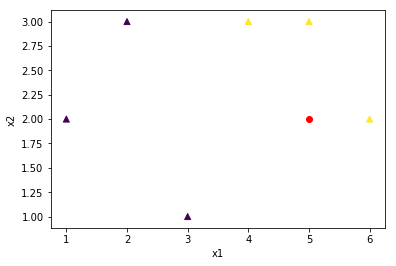

In [2]:
x_train = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_train = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

x_test = [[5,2]]
y_test = [[1]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

##  Tensorflow Session
### 위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train)).repeat()

iter = dataset.make_initializable_iterator()
features, labels = iter.get_next()

features = tf.cast(features, tf.float32)
labels = tf.cast(labels, tf.float32)

### 위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들도록 하겠습니다
* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([2, 1]) )

In [4]:
W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

### Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

$$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [5]:
hypothesis  = tf.div(1., 1. + tf.exp(tf.matmul(features, W) + b))

### 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if  &  y=0
\end{align}
$$

* 위 두수식을 합치면 아래과 같습니다
$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [6]:
cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1 - labels) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 추론한 값은 0.5를 기준(Sigmoid 그래프 참조)로 0과 1의 값을 리턴합니다.
* Sigmoid 함수를 통해 예측값이 0.5보다 크면 1을 반환하고 0.5보다 작으면 0으로 반환합니다.

In [7]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

### 가설을 통해 실재 값과 비교한 정확도를 측정합니다

In [8]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))

### Tensorflow를 통한 실행을 위해 Session를 선언합니다.
* 위의 Data를 Cost함수를 통해 학습시킨 후 모델을 생성합니다. 
* 새로운 Data를 통한 검증 수행 [5,2]의 Data로 테스트 수행 (그래프상 1이 나와야 정상입니다)

In [9]:
EPOCHS = 10001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value = sess.run([train, cost])
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
    h, c, a = sess.run([hypothesis, predicted, accuracy])
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
    print("\nTest Data : {}, Predict : {}".format(x_test, sess.run(predicted, feed_dict={features: x_test})))


Iter: 0, Loss: 0.6931
Iter: 1000, Loss: 0.4145
Iter: 2000, Loss: 0.3496
Iter: 3000, Loss: 0.3014
Iter: 4000, Loss: 0.2636
Iter: 5000, Loss: 0.2336
Iter: 6000, Loss: 0.2094
Iter: 7000, Loss: 0.1896
Iter: 8000, Loss: 0.1731
Iter: 9000, Loss: 0.1592
Iter: 10000, Loss: 0.1474

Hypothesis:  [[0.02987642]
 [0.1576593 ]
 [0.30070737]
 [0.78328896]
 [0.9407705 ]
 [0.98057085]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1

Test Data : [[5, 2]], Predict : [[1.]]
